## Code execution environment
To test the prompt-generated code, keep the Jupyter Notebook open in a separate tab in your web browser. The notebook has some setup instructions that you should complete now.

The data set for this lab is available in the following URL.

`URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"`

<br>

---

### Importing the Dataset


In [4]:
# %pip install pandas
import pandas as pd

# 1. Read the CSV file into a pandas data frame
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(file_path)

# 2. Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


### Data Preparation
#### Data Cleaning

In [13]:
# 1. Identify the columns of the data frame with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# 2. Replace the missing values with the mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column] = df[column].fillna(mean_value)

# 3. Delete duplicate entries from the data frame
df.drop_duplicates(inplace=True)

print(df[df["price"]=="Fiesta"])

Empty DataFrame
Columns: [model, year, transmission, mileage, fuelType, tax, mpg, engineSize, price]
Index: []


### Data Insights and Visualization

1. Identify the 5 attributes that have the highest correlation with the `price` parameter.

In [18]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort the correlation values with respect to the target attribute
correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)

# Exclude the target attribute itself
correlation_with_target = correlation_with_target.drop('price')

# Get the top 5 attributes with the highest correlation
top_correlated_attributes = correlation_with_target.head(5)

print(top_correlated_attributes)

year          0.635715
mileage       0.530483
engineSize    0.411451
tax           0.405970
mpg           0.346263
Name: price, dtype: float64


2. Count the number of cars under each unique value of `fuelType` attribute.

In [19]:
# Count the number of cars under each unique value of the 'fuelType' attribute
fuel_type_counts = df['fuelType'].value_counts()

print(fuel_type_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of `transmission` have more price outliers. Use the Seaborn library for creating the plot.

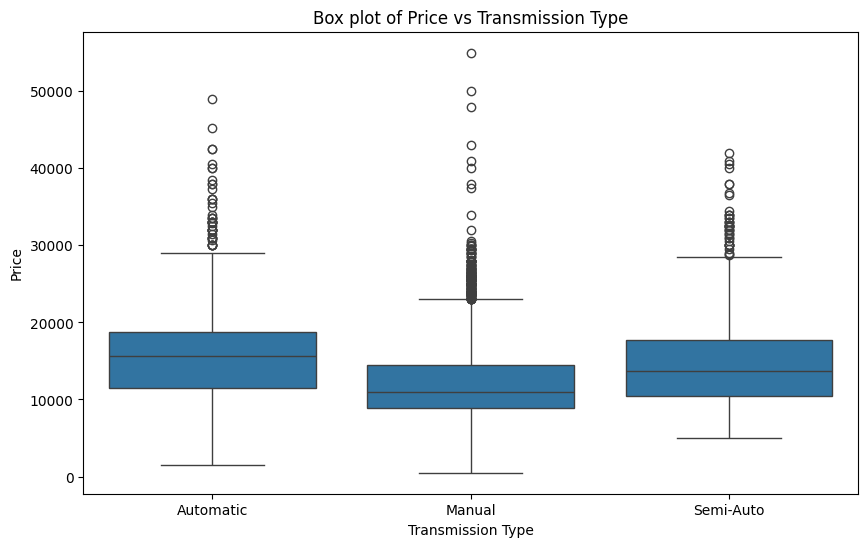

In [22]:
# import pandas as pd
# %pip install seaborn
# %pip install matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn box plot to compare transmission types and price outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Box plot of Price vs Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

4. Generate the regression plot between `mpg` parameter and the price to determine the correlation `type` between the two.

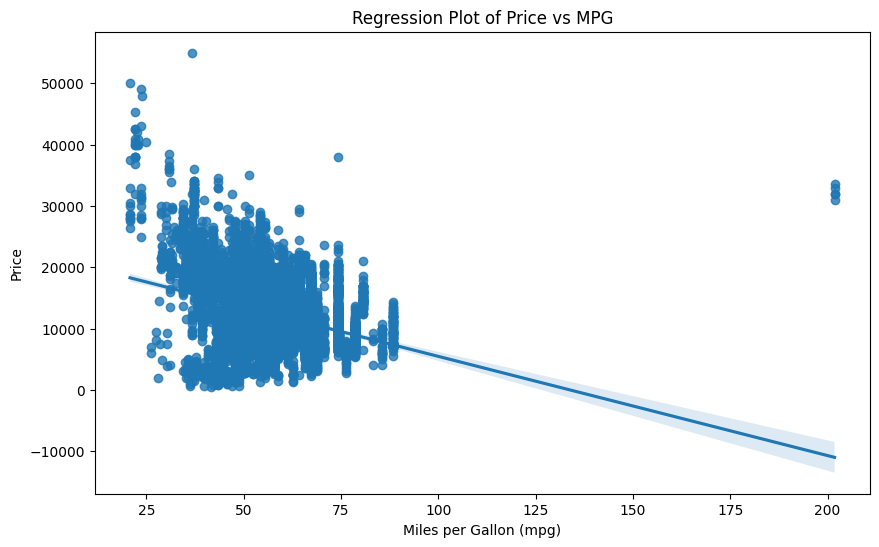

In [23]:
# Create a Seaborn regression plot to visualize the correlation between 'mpg' and 'price'
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=df)
plt.title('Regression Plot of Price vs MPG')
plt.xlabel('Miles per Gallon (mpg)')
plt.ylabel('Price')
plt.show()

### Model Development and Evaluation

1. Fit a linear regression model to predict the `price` using the feature `mpg`. Then calculate the R^2 and MSE values for the model.

In [33]:
# import pandas as pd
# %pip install scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the feature 'mpg' and target 'price' from the dataframe
X = df[['mpg']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate R^2 and MSE values
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.1198980224962416
Mean Squared Error: 19741690.809446193


2. Fit a linear regression model to predict the `price` using the following set of features.\
`year`, `mileage`, `tax`, `mpg` and `engineSize`.\
Calculate the R^2 and MSE values for this model.

In [34]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# Extract the features and target from the dataframe
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate R^2 and MSE values
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.7265379654546948
Mean Squared Error: 6134065.2243818585


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

In [36]:
# import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# Extract the features and target from the dataframe
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline with standard scalar, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

# Fit the pipeline model
pipeline.fit(X, y)

# Make predictions
predictions = pipeline.predict(X)

# Calculate R^2 and MSE values
r2 = r2_score(y, predictions)
mse = mean_squared_error(y, predictions)

print("R^2 Score:", r2)
print("Mean Squared Error:", mse)

R^2 Score: 0.7666619695239302
Mean Squared Error: 5234038.06546274


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [37]:

# import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# Extract the features and target from the dataframe
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = ridge_model.predict(X_test)

# Calculate R^2 and MSE values for the Ridge Regression model
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R^2 Score on Test Data:", r2)
print("Mean Squared Error on Test Data:", mse)

R^2 Score on Test Data: 0.6917134446113249
Mean Squared Error on Test Data: 6912725.801054675


5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

In [39]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# Extract the features and target from the dataframe
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model with regularization parameter 0.1 using the polynomial features
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the test data
predictions = ridge_model.predict(X_test_poly)

# Calculate R^2 and MSE values for the Ridge Regression model with polynomial features
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R^2 Score on Test Data with Polynomial Features:", r2)
print("Mean Squared Error on Test Data with Polynomial Features:", mse)

R^2 Score on Test Data with Polynomial Features: 0.6732748727340991
Mean Squared Error on Test Data with Polynomial Features: 7326174.87731946


C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [40]:
# import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import Ridge
# from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is the pandas dataframe you are working with

# Extract the features and target from the dataframe
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Set up the parameter grid for Grid Search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Create and fit a Grid Search on Ridge regression with cross-validation
ridge_model = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, cv=4)
grid_search.fit(X_train_poly, y_train)

# Get the best estimator from the Grid Search
best_ridge = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
predictions = best_ridge.predict(X_test_poly)

# Calculate R^2 and MSE values for the Ridge Regression model with the best alpha value
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("Best Alpha Value:", best_ridge.alpha)
print("R^2 Score on Test Data with Best Alpha:", r2)
print("Mean Squared Error on Test Data with Best Alpha:", mse)

Best Alpha Value: 0.01
R^2 Score on Test Data with Best Alpha: 0.3827341032118411
Mean Squared Error on Test Data with Best Alpha: 13840985.979615659


C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\rodri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\rodri\AppD